In [49]:
import numpy as np
import pandas as pd

In [50]:
data=pd.read_csv('./Iris.csv')

In [51]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [53]:
data.drop("Id",axis=1,inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [55]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [57]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [58]:
data['Species']=data['Species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

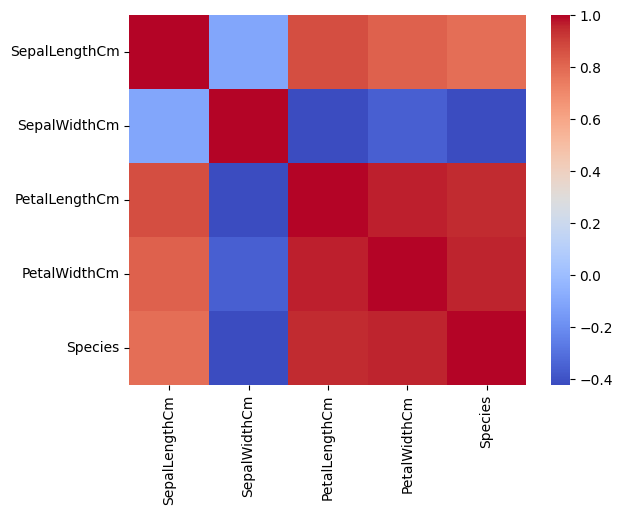

In [62]:
sns.heatmap(data.corr(),cmap="coolwarm")

<Axes: >

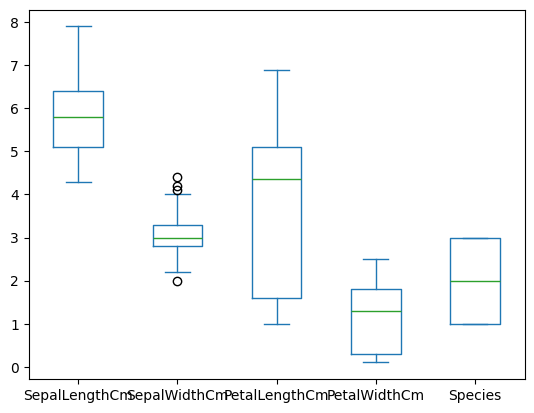

In [ ]:
data.plot(kind='box')


<Axes: >

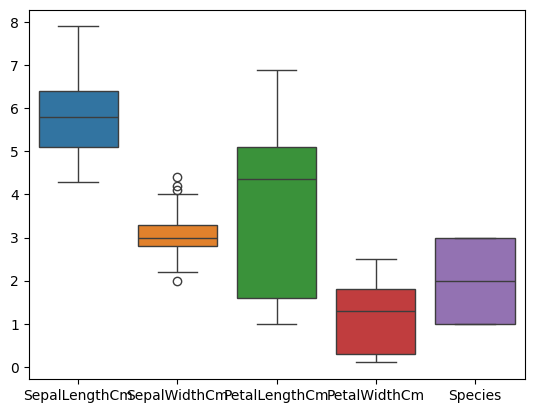

In [64]:
sns.boxplot(data)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
y=data['Species']

In [68]:
data.drop("Species",axis=1,inplace=True)
x=data

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [71]:
model = KNeighborsClassifier(n_neighbors=3)

In [72]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
y_pred = model.predict(x_test)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [75]:
accuracy_score = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy_score*100, "%")

Accuracy:  100.0 %


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)  


StandardScaler()

In [77]:
import pickle as pkl

pkl.dump(model, open('model.pkl', 'wb'))
pkl.dump(scaler, open('scaler.pkl', 'wb'))


In [78]:
with open('scaler.pkl', 'rb') as scaler_file:
    data = pkl.load(scaler_file)
